<h1 align="center">Física Computacional.</h1>
<h1 align="center">Tarea-Practica3</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis


---
### Resendiz Reyes Pablo Axel

### **EJERCICIOS**:

$\;$

#### **1. Regla del Trapecio**
#### El archivo velocidades.txt (adjunto), contiene dos columnas de numeros, la primera representa el tiempo $t$ en segundos y la segunda la x-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo $t = 0$ hasta $t = 100$. Las primeras líneas se ven así:

<h5>0 0</h5>
<h5>1 0.069478</h5> 
<h5>2 0.137694</h5> 
<h5>3 0.204332</h5> 
<h5>4 0.269083</h5> 
<h5>5 0.331656</h5>

#### Escrbibe un programa para hacer lo siguiente:

In [16]:
#Antes de empezar con el programa debemos improtar las bibliotecas
import matplotlib.pyplot as plt
import numpy as np


#### **(a)** Lee los datos y, usando la **regla del trapecio**, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la direccion x como una funcion del tiempo.

In [29]:
#Leemos los datos y los guardamos en 2 listas
t = []
v = []
data = []

buff = open('velocidades.txt','r')

for i in buff:
    data.append(i.split()) #guardamos los datos en buff como pares

#ahora guardamos en cada lista
for k in data:
    t.append(float(k[0]))
    v.append(float(k[1]))
t = np.array(t)
v = np.array(v)

In [49]:
#una ves teniendo ambas listas generaremos el metodo del trapecio
def trap(t,v):
    #generamos nuestros valores iniciales
    N = len(t)
    #como tenemos una funcion con particion homogenea basta escojer h de esta forma
    #h = v[100]-v[0]/len(t)
    #pero como tenemos listas es inecesario
    #valor inicial de la integral
    I = (v[0]+v[100])/2

    # generamos el metodo del trapecio
    for k in range(1,N-1):
        I += v[0 + k]
    return float(I)
    


In [50]:
print('La particula recorre:',trap(t,v),'m')

La particula recorre: 8.218924000000017 m


#### **(b)** Extiende tu programa para hacer una gráfica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una funcion del tiempo.

In [51]:
#una ves teniendo ambas listas generaremos el metodo del trapecio
def trap(t,v):
    #generamos nuestros valores iniciales
    N = len(t)
    #como tenemos una funcion con particion homogenea basta escojer h de esta forma
    #h = v[100]-v[0]/len(t)
    #pero como tenemos listas es inecesario
    #valor inicial de la integral
    I = (v[0]+v[100])/2
    xs = []
    # generamos el metodo del trapecio
    for k in range(1,N-1):
        I += v[0 + k]
        xs.append(I)
    return float(I),xs
    

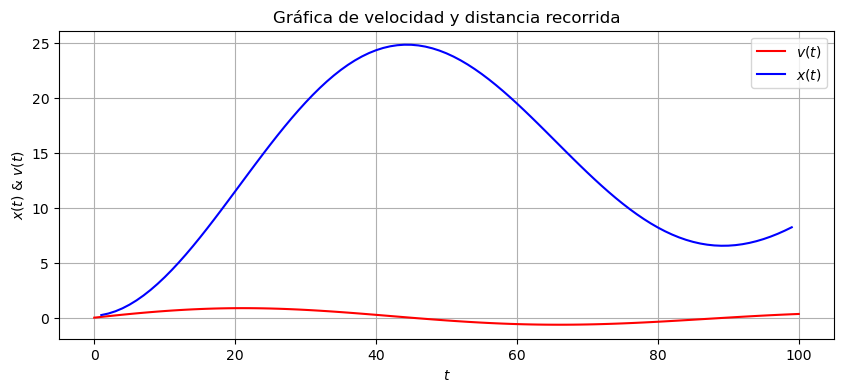

In [57]:
I, xs = trap(t,v)

plt.figure(figsize=(10,4))
plt.plot(t,v,color='r',label='$v(t)$')
plt.plot(t[1:100],xs,color='b',label='$x(t)$')
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$ & $v(t)$")
plt.title(r"Gráfica de velocidad y distancia recorrida")
plt.legend()
plt.grid()
plt.show()

#### **2. Integración numérica.**

#### (a) Escribe un programa para calcular un valor aproximado para la integral

<h4 align="center">$\int _{0}^{2}(x^4 -2x +1 ) dx $,</h4

#### utilizando la regla de trapecio y la regla de simpson con 10 divisiones.

In [62]:
#primero empecemos la funcion 
def f1(x):
    return ((x**4) -(2*x) + 1)

#ahora generamos los metodos de integracion


def trap2(f,a,b,N):
    h = (b - a)/N
    I = f(b)/2 + f(a)/2
    

    for k in range(1,N):
        I += f(a + k*h)
    return h*(I)

def simp(f,a,b,N):
    h = (b-a) / N
    I = f(a) + f(b)


    for k in range(1,N): #aqui no separamos con el n/2 porque nuestro codigo ya esta haciendo eso con el if

        if k%2 == 0:
            I += 2*f(a + (k*h))
        else:
            I += 4*f(a + (k*h))
    return (h/3)*I

def IntSimpson(f,a,b,N):

    s = 0.0
    h = (b-a)/N

    s = s + (f(a)+f(b))

    for k in np.arange(1,N/2+1):
        s = s + 4*f(a+(2*(k-1))*h)

    for k in np.arange(1,N/2):
        s = s + 2*f(a+(2*k*h))
    
    s = (h/3)*s

    return float(s)
        
    
def F1(x):
    return (x**5)/5 - (x**2) + x

#### (b) Ejectura el programa y compara tu resultado con el valor correcto de 4.4. ¿Cuál es el error de tu cálculo?

In [63]:
a = 0
b = 2
#Para este caso usemos N = 10
N = 10
h = (b - a)/N
#print(h)
Int = F1(2) - F1(0)
print(Int)
print(trap2(f1,a,b,N))
print(simp(f1,a,b,N))
print(IntSimpson(f1,a,b,N))

4.4
4.50656
4.400426666666667
3.22496


#### (c) Modifica el programa para utilizar 100 divisiones y luego 1000. ¿Cómo mejora el resultado?. ¿Cómo se compraran los resultados entre ambas reglas al usar la misma cantidad de divisiones?

In [54]:
print(list(range(1,(N/2)+1)))

TypeError: 'float' object cannot be interpreted as an integer

#### **3. El límite de difracción de un telescopio.**

#### Nuestra capacidad para resolver detalles en observaciones astronomicas está limitada por la difraccion de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. Cuando dicha luz, con una longitud de onda $\lambda$, pasa a traves de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patron de difracción circular que consta de un punto central rodeado por una serie de anillos concentricos. La intensidad de la luz en este patron de difracción está dada por:

<h4 align="center">$I( r) =\left(\frac{J_{1}( kr)}{kr}\right)^{2}$,</h4>

#### donde $r$ es la distancia en el plano focal desde el centro del patron de difracción, $k =2\pi/\lambda$ y $J_{1}(x)$ es una función de Bessel. Las funciones de Bessel $J_{m}(x)$ estan dadas por:

<h4 align="center">$J_{m}( x) =\frac{1}{\pi }\int _{0}^{\pi }\cos( m\theta -x\sin \theta ) d\theta $,</h4>

#### donde $m$ es un entero no negativo y $x ≥ 0$.

#### **(a)** Escribe una función $J(m,x)$ que calcule el valor de $J_{m}(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha funcion en un programa para graficar, en un solo grafico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como una funcion de $x$ (de $x = 0$ a $x = 20$).

#### **(b)** Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla de Simpson.

#### **(c)** Escribe un segundo programa que haga una grafica de densidad (density plot) de la intensidad del patron de difracción circular de una fuente de luz puntual con $\lambda = 500 nm$, en una region cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de $r$ desde cero hasta aproximadamente $1 \mu m$.

#### Hint 1: Puede resultarte útil saber que $\lim _{x\ \rightarrow 0}\frac{h( x)}{x} =\frac{1}{2}$.

#### Hint 2: El punto central en el patron de difracción es tan brillante que puede resultar difícil ver los anillos que lo rodean en la pantalla de la computadora; para solucionar esta situación puedes usar el esquema “hot” funciona bien. Tu gráfica debería verse algo así:

<div align="center">
    <img src="Im.TareaPractica04.Problema2.png">
</div>

#### **4. Capacidad calorífica de un sólido**

#### La teoría de sólidos de Debye dice que la capacidad calorífica de un solido a una temperatura $T$ esta dada por:

<h4 align="center">$C_{V} =9V\rho k_{B}\left(\frac{T}{\theta _{D}}\right)^{3}\int _{0}^{\theta _{D} /T}\frac{x^{4} e^{x}}{\left( e^{x} -1\right)^{2}} dx$,</h4>
       
#### donde $V$ es el volumen del sólido, $\rho$ es la densidad numerica de los átomos, $k_B$ es la constante de Boltzmann y $\theta _D$ es la llamada temperatura de Debye, una propiedad de sólidos que depende de su densidad y la velocidad del sonido.

#### **(a)** Escribe una función $Cv(T)$ que calcule la $C_V$ para un valor dado de temperatura, de una muestra que consta de $1000$ centímetros cúbicos de aluminio sólido, con densidad numérica de $\rho = 6.022 \times 10^{28} m^{−3}$ y una temperatura de Debye de $\theta _D = 428 K$. Utiliza la **cuadratura gaussiana** para evaluar la integral, con $N = 50$ puntos muestra.

#### **(b)**  Usa tu función para hacer una gráfica de la capacidad calorífica en funcion de la temperatura desde $T = 5 K$ hasta $T = 500 K$.

#### **4. Atracción gravitacional de una lámina uniforme**

#### Una lamina de metal cuadrada uniforme flota inmóvil en el espacio:

<div align="center">
    <img src="Im.TareaPractica04.Problema4.png">
</div>
       
#### La lamina mide $10 m$ de lado, tiene un espesor insignificante y una masa de $10$ toneladas.

#### **(a)** Considera la fuerza gravitacional debida a la placa que siente una masa puntual de $1 kg$ a una distancia $z$ del centro del cuadrado, en direccion perpendicular a la lamina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ es

<h4 align="center">$F_{z} =G\sigma z\int \int _{-L/2}^{L/2}\frac{dxdy}{\left( x^{2} +y^{2} +z\right)^{3/2}}$,</h4>

#### donde $G = 6.674 \times 10^{-11} m^{3} kg^{−1}s^{−2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de area de la hoja.

#### **(b)**  Escribe un programa para calcular y graficar la fuerza en función de $z$ de $z = 0$ hasta $z = 10 m$. Para la integral doble utiliza la cuadratura Gaussiana (doble)

<h4 align="center">$I=\simeq \sum _{i=1}^{N}\sum _{j=1}^{N} \omega _{i} \omega _{j} f( x_{i} ,x_{j})$,</h4>

#### con $100$ puntos de muestra a lo largo de cada eje.